# Bin Packing Lab

- Authors:
  - Arash Ghafoori, ghafoa4@mcmaster.ca
  - Jad Kharboutly, kharbouj@mcmaster.ca
- Group ID on Avenue: 24
- Gitlab URL:https://gitlab.cas.mcmaster.ca/ghafoa4/l2-bin-packing

# T1: UNDERSTAND THE CODE BASE

## SOLID principles:
Our first step was to analyze the strucutre of the initial given files and discover how each file follows the SOLID principles. After analyzing each file carefully, we realized that the following principles were applied:


### Open/Closed:
The first principle we observe is the open/closed principle, this principle ensures that our program is open for extension, but closed for modification. In the reader file, we have DatasetReader class that has an abstract method "_ _load_data_from_disk_" which is overwritten in the class BinppReader. The purpose of this program is to ensure that if the program wants to read the data in a different way, it would not need to modify the original method, and it can just change it by just simply extneding the different method.

This principle is again repeated in the offline and online files as well. These 2 files both have sepereate and different classes called NextFit that inherit the abstract methods of Offline and Online from the model class respectively. The abstract methods are both called "_ _process_" in both classes Online and Offline, and in each NextFit class, each of these abstract methods are overwritten. This pirnciple again indicates how we just extend to the method without modifying the original version.

And lastly, this principle is again repeated in the baseline file as well, by again extending the "_ _process_" method to the original version that is located in the model file without modifying it.

### Dependency Inversion:
Another principle we observed, was the dependency inversion principle. This principle ensures that high level modules do not depend on low-level modules and that abstractions should not depend on details, but vice versa. In the first example, we could observe that the classes NextFit and BenMaier in the files offline and baseline respectively are dependant on the higher level class Offline in the model file. In the Offline class, the abstraction does not depend on the details, however on its subclasses, the details do depend on their abstraction.

The next place we could observe this principle is the NextFit class in the online file which depends on the Online class of the model file. Similar to the occurence above, the Online class is at a higher level and is not dependant on the lower level classes such as NextFit, however the details on the NextFit class depend on the abstraction in the higher level.

## Dataset Analysis:
In the given dataset directory, we could locate 3 different directories "binpp", "binpp-hard" and "jburkardt" where each directory itself contains multiple directories or files itself.

### binpp:
After reviewing the source file in this directory, we realized that each of the directories in Binpp share the same format of N#C#W# where instead of "#", we could replace it with different numbers that follow certain parameters and domains. And inside each of these directories, we could see that there are files that share the initial format with the addition of N#C#W#_ Z where the "Z" is equal to a letter. Inside each directory, all the files have the same N#C#W# and they start from N#C#W#_ A up to N#C#W#_ T.

**N#**: Corresponds to the number of items within a file. 
Has a domain of 1,2,3,4 that corresponds to the 50,100,200,500 items respectively.

**C#**: Corresponds to the bin capacity within a file.
Has a domain of 1,2,3 that corresponds to the 100,120,150 capacities respectively.

**W#**: Corresponds to the weight range in the file.
Has a domain of 1,2,4 that corresponds to the [1,100],[20,100],[30,100] respectively.

In each file inside the directories within the binpp directory, the first value indicates the number of items in the bin, and the second value indicates the capacity of the bin it is allocated to.

##### importance:
In the BinppReader class of the Reader file, we observe that in the "_ _load_data_from_disk_" method, the first 2 lines which correspond to the number of items and the capacity of the bin are recorded in seperate variables _nb_objects_ and _capacity_ respectively. These 2 variables are then returned as the weightset variable which will be implemented in multiple other classes as well. Then in the subclass of the BinPacker class, the Offline class, we could observe that the weightset is recorded. The weightset is then used in the subclass of the Offline class, the NextFit class that is located within the offline file.


### binnpp-hard:
The binpp-hard directory contained the files in the format HARD#.BPP.txt where # is a number from 0..9. The first value of each file indicated the number of items we need to pack in each file and the second value corresponded to the capacity of the bins allocated. For all of the files in this directory, there were 200 items to pack and the capacity of teh bins were 100000. In addition, the weight of all the files are ranged from [20000,35000].

##### importance:
Since the binpp-hard dataset files follow the exact same format as the binpp files, it will have the same importance as well.

### jburkardt
In the jburkardt directory, there were 12 files located, each with the format p0#_Z.txt where the "#" corresponded to a number between 0..4 and "Z" corresponded to one of the letters [c,s,w]. Each # contains all three of the c,s,w files and each file correspondsto:

**p0#_c.txt**: This file contains only one value which indicates the capacity of the bins.

**p0#_s.txt**: This file contains n items which is equal to the number of values in the p0#_w.txt file. Each value corresponds to the solution for each bin for the n items.

**p0#_w.txt**: This file contains n items which is equal to the number of values in the p0#_s.txt file. Each value corresponds to the weight of each bin for the n items.

##### importance:
In the reader file, we will be implmenting a new reader class that will read the data from the jburkardt directory, and will reuturn a value in the format of WeightSet alias. And as mentioned earlier in the binpp importance, the WeightSet recorded will be used in the Offline class, and the offline file.

# T2: IMPLEMENT AND BENCHMARK ALGORITHMS

Our next step was implementing 3 Online algorithms: First Fit, Best Fit, Worst Fit and 3 Offline algorithms: First Fit Decreasing, Best Fit Decreasing, Worst Fit Decreasing. In order to compare the algorithm's performance, we had to assert certain KPI's in each of the algorithms which helped us differentiate between the algorithm's performances.

**The KPI's that we allocated to measure the performance of each algorithm:**

**Number of bins created:** Throughout Each iteration of the algorithms on each case, we measured the number of bins each algorithm created.

**Number of compares:** Throughout Each iteration of the algorithms on each case, we measure the number of times a weight has to possibility to be allocated to another bin without reaching the maximum capacity.

**Number of tims a weight is checked with the previous bin:** Throughout each iteration of the algorithms on each case, we measure the number of times a weight is checked with the previous bin to check if it fits in the previous bin.

To test and compare our algorithms, we implemented a benchmark which reported the values of each of these KPIs for each algorithm and all the cases within the 4 cases N1C1W1, N2C1W1, N3C1W1 and N4C2W2 directories. The results below indicates the results of our KPI that was run throughout each of the Online and Offline algorithm:

In [1]:
import benchmarking
results = benchmarking
CASES = ['./_datasets/binpp/N1C1W1', './_datasets/binpp/N2C1W1', './_datasets/binpp/N3C1W1', './_datasets/binpp/N4C2W2']
results.main(CASES)

----------------------- Case(0) -----------------------

32
----- NextFit (Online) -----

bins: 32
Number of bins created:  31
Number of times weight is checked with previous bins:  0
Number of compares:  50
27
----- FirstFit (Online) -----

bins: 27
Number of bins created:  26
Number of times weight is checked with previous bins:  535
Number of compares:  535
27
----- BestFit (Online) -----

bins: 27
Number of bins created:  26
Number of times weight is checked with previous bins:  670
Number of compares:  670
29
----- WorstFit (Online) -----

bins: 29
Number of bins created:  28
Number of times weight is checked with previous bins:  737
Number of compares:  737
26
----- RefinedFirstFit (Online) -----

bins: 26
Number of bins created:  26
Number of times weight is checked with previous bins:  530
Number of compares:  530
32
----- NextFit (Offline) -----

bins: 32
Number of bins created:  31
Number of times weight is checked with previous bins:  0
Number of compares:  50
26
----- First

<img src="./note_images/T2_bins_created.png" alt="Alternative text" width="600"/>

<img src="./note_images/T2_compares.png" alt="Alternative text" width="600"/>

<img src="./note_images/T2_checked_bins.png" alt="Alternative text" width="600"/>

Then by Implementing the pyperf module, we measure the execution time of each of the algorithms and graphed the result based on the number of weights. These graphs would represent which algorithms had higher execution time relative to the others. We then compare the values of the execution times to the KPIs that we implemented, and ensure that our benchmarking protocol is relevant.

<img src="./note_images/T2_time.png" alt="Alternative text" width="800"/>

<img src="./note_images/T2_time2.png" alt="Alternative text"/>

### Online FirstFit:
In the FirstFit implementaiton, we first scan all the previous bins, and will place the weight in the first bin that could fit and not reach the maximum capacity. <br />
The execution time for our implementation of the FirstFit algorithm is approximately equal to O(n^2). We could also observe that the execution time for the NextFit algorithm is relatively higher compared to the other algorithms in our timechart. We could observe that our timing benchmark is also aligned with the KPIs of number of comparisons, both number of comparisons and number of times checked with the previous bin are lower than the BestFit and WorstFit version.

### Online BestFit:
In our BestFit implementation, we place the item in the tightest spot possible, by scanning through all the bins that we have created and finding the minimum difference value between the remaing capcity and weight. Although despite its more accurate Solution value, it does have a relatively higher execution time compared to FirstFit. The execution time for Online bestfit is O(n^2) as well, and is approximately equal to Online WorstFit's execution time however the number of bins that they produce are much lower than the worstFit, therefore it has a better performance.

### Online WorstFit:
In our worstFit implementation, we try to place the weight in the least tightest possible. This means that by scanning through all the previous created bins, we check which is the maximum difference value between the remaining capacity and weight. The implementation of this algorithm is very similar to the BestFit algorithm which is why they do have almost equal execution itmes O(n^2). However, By comparing the number of bins they produce we could observe that the performance is of the BestFit algorithm is relatively better.

### Offline FirstFit Decreasing:
The FirstFit decreasing algorithm uses an implementaion of the Online Algorithm to place the biggest items first by first sorting our input sequence. Therefore it will show better performance compared to the online algorithm FirstFit in terms of the minimal number of chose bins. However the execution time will still be O(n^2) which is not an ideal implementation when the number of weights increases. It still does perform better than the BestFit and the worstFit algorithms in terms of execution time performance which we could also observe in our KPI results as well.

### Offline BestFit Decreasing:
The BestFit decreasing algorithm, same as the FirstFit algorithm sorts the inputs sequence first and then implements the BestFit Online algorithm. The algorithm's results were much better in terms of performance of finding the minimal number of bins relative to its online version. However, The implementation would still require O(n^2) execution time and is almost equivaluent the WorstFit Decreasing algorithm's execution time. 

### Offline WorstFit Decreasing:
The WorstFit decreasing algorithm also implemented the WorstFit Online algorithm by first sorting the inputs' sequence first and then implementing the WorstFit Online algorithm. The algorithm's performance in terms of minimal number of bins was realatively better to its online version and almost equal to all the other Offline algorithms. However, its execution time was still O(n^2) and was approximately equal to the BestFit decreasing execution time. The results were still aligned with the KPIs that we developed, the number of comparisons were much higher than the FirstFit decreasing algorithm, like the execution time. 

***Overall, each of the execution times that we measure with the pyperf module were aligned with all the KPIs we develped which means the benchmarking protocol we implemented was relevant and algined with the execution times.***

# T3: MEASURE IMPROVEMENT MARGIN

in order to compare the results of each algorithm, we have implemented an optimal_comparison class which will first iterate through the optimal solutions to receive the optimal values. Then we will calculate the number of bins each algorithms used and we deduct the optimal solution from the calculated value. The n value will represent our continuous margin of improvement.

Below, we create an instance of our optimal_comparison class to plot and show the results of the continuous margins of improvement. In this case, we have considered the N4C2W2 bin, which means there are 500 objects with the bin capacity of 120, and the weight interval is between 20 to 100. <br />
The colors in the plot will correspond to the algorithms: <br /> <br />
red: NextFit (Online) <br />
green: FirstFit (Online) <br />
blue: BestFit (Online) <br />
yellow: WorstFit (Online) <br />
pink: NextFit (Offline) <br />
black: FirstFit (Offline) <br />
orange: BestFit (Offline) <br />
purple: WorstFit (Online) <br />
gray: Baseline (Offline)

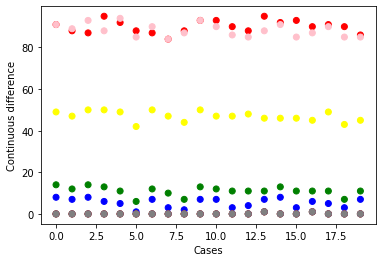

In [1]:
import optimal_comparison
optimal = optimal_comparison
file = "_datasets/optimal_values/binpp.csv"
format="N4C2W2"
CASES = '_datasets/binpp/N4C2W2'
optimal.main(file,format,CASES)

<img src="./note_images/T3_1_6.png" alt="Alternative text" />

<img src="./note_images/T3_7_12.png" alt="Alternative text" />

<img src="./note_images/T3_13_18.png" alt="Alternative text" />

As you could see, both between the bar graphs and the plot, the offline algorithms in general showed a better performance in terms of finding the optimal value. Both NextFit algorithms in Online and Offline showed the highest margins of improvement. Amongst the other Online versions, BestFit, FirstFit and WorstFit showed better performance respectively. And almost all the other offline algorithms including the baseline value were almost identical to the optimal value. <br />
**The same results were consistent in the other binpp-cases and also binpp-hard cases as well.** <br />
However it was much harder to distinguish the margins of improvement in the jburkardt cases. Due to the small number of cases, and smaller values of the required bins, the results for all the algorithms were approximately equal to each other. The max amount of margin of improvment in all of our test cases was only one. <br />
below I have attached another scatter plot of the continuous margins of improvement.

<img src="./note_images/T3_jburkardt.png" alt="Alternative text" width="600" />

# T4: ADD SMARTER ALGORITHMS

### Normalizing Dataset Cases:
The first step of Normalizing dataset cases was assigning special heurestics to each of the weights. The heurestics that we implemented were based on assuming the reatio of the maximum capacity is equal to 1: <br /> <br />
weight [1/2,1]: Class A <br />
weight [2/5,1/2): Class B <br />
weight [1/3,2/5): Class C <br />
weight [0,1/3): Class D <br />

In order to normalize our dataset without change the readers' function, inside the online mthod of the Dataset we add a Normalize parameter which by default is set to false, however if it evaluetes true, we will create an instance of Normalized_reading a create a Normalized dataset. The return value when we normalize the data, will be a 2D array [int, list[int,str]], the str being the heurestic of each of the weights in the array. We will then use the heurestics of each of the weights to set each of the weights into their corresponding bins.

### Refind First Fit:
The Refind First Fit algorithm uses the same implementation as the Online First Fit algorithm, however it also implemented the heurestics of the weights as well. The algorithm will first discover the heurestic of each of the weight in each iteration. Each of the weights, based on their heurestics could then be placed in different bins as well. The bins of type A,B,C,D will correspond to the weight heurestics A,B,C,D. Each weight that will enter the iteration will first implement the online FirstFit implemntation on the A bin, then then B bin, then the C bin, and finally the D bin. If they weight cannot be placed in any of the previously made bin, it will create a new bin that will correspond to its own heurestics, for instance a weight A that does not fit in any of the previously made bins, will create a new bin of class A. After going through all the iterations of the bins, the algorithm will then add all of bins of types A,B,C,D into the solution format which will include the sum the bin's content as well.

### Algorithm Analysis:
Based on the KPIs that we developed ourselves, we could see that in terms of finding the minimal number of bins, the Refind First Fit algorithm showed results imsilar to the BestFit Online algorithm. However in terms of the other KPIs such as the number of comparisons and the number of comparisons with the previous bin, the results were much higher than all the other Online algorithm which indicated a poor performace in terms of execution time.
The time complexity for the refined first fit algorithm is kO(n^2) which is relatively much higher than the other online algorithms that we implemented.

We applied the same test cases that we applied for benchmarking the T2 performances to compare both the KPI values. The results for the KPI and the execution time were:

In [3]:
import T4_analysis
refind = T4_analysis
CASES = ['./_datasets/binpp/N1C1W1', './_datasets/binpp/N2C1W1', './_datasets/binpp/N3C1W1', './_datasets/binpp/N4C2W2']
refind.main(CASES)

----------------------- Case(0) -----------------------
27
Number of bins created:  27
Number of times weight is checked with previous bins:  522
Number of compares:  522
----------------------- Case(1) -----------------------
49
Number of bins created:  49
Number of times weight is checked with previous bins:  1863
Number of compares:  1863
----------------------- Case(2) -----------------------
104
Number of bins created:  104
Number of times weight is checked with previous bins:  8263
Number of compares:  8263
----------------------- Case(3) -----------------------
277
Number of bins created:  277
Number of times weight is checked with previous bins:  62141
Number of compares:  62141


<img src="./note_images/T4_bins_created.png" alt="Alternative text" width="600"/>

<img src="./note_images/T4_compares.png" alt="Alternative text" width="600"/>

<img src="./note_images/T4_checked_bins.png" alt="Alternative text" width="600"/>

## T5: FROM FIXED CAPACITY TO FIXED BINS

### Multiway Number Partitioning:
In order to integrate a baseline for the number of bins available, we implemented a MultiwayNumberPartioning class in the Baseline file. The next step was to implement an algorithm that will allocate the items into the bins to ensure that the sum of each bin is approximately equal to one another.

### Multifit Algorithm:
The purpose of this algorithm is to ensure that the sum of the weights in the largest bin is as small and optimized as possible. Multifit algorithm will implement the FirstFit Decreasing algorithm, that we explained in T2, each time to find a capacity that will pack all the weight into the **n(limited)** number of bins that we defined.

**The algorithm will use binary search in order to find the:** <br />
The minimum capcity value that will cause the weights to be in more than **n(limited)** number of bins. <br />
The maximum capacity value that will cause the weight be in less than **n(limited)** number of bins. <br />

Throughout each iteration, it will find the maximum and minimum values and will implemented the FirstFit Decreasing algorithm to assign new values to the maximum and minimum capacity. These iteration will continue for (number of weights)/2 times until we reach the most optimized solution.

### Largest Sum:
The largest sum algorithm is an additional algorithm that we applied. This algorithm will iterate through the bins and tries to minimize the largest sum possible, which will ensure the weights in each of the bins are relatively optimized. We implemented this algorithm by getting the smallest weight from the calculated solutions bin in each iteration of the weightstream.

### Algorithm Analysis:

After implementing the pyperf library to benchmark our dataset, we observed that the runtime complexity for the multifit algorithm is k * O(n^2) due to the implementation of the FirstFit decreasing algorithm. Unfortunately we were not able to implement our KPIs from the previous benchmarks into this algorithm, because they were not showing an accurate represnetation of the performance. The KPIs that we implemented measure the number of comparisons we had to make with a previous bin, however in the multifit algorithm we are comparing the maximum and capacity values. The largest sum algorithm on the other hand showed a linear time complexity with a much less value execution time compared to the largest sum problem. In addition, the multiway partioning p

<img src="./note_images/T5_time.png" alt="Alternative text" width="600" />

## Self-reflection questions

#### Arash Ghafoori
As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward) <br />
  
  Our first approach as a group after completing the T1 and T2 sections resepectively, we realized that the rest of the sections did not necesserily require or rely on one another. Therefore after the T2 section, we distributed works evenly so each of the members could work on it in their own time. Unlike the previous assignment, each of the sections was not a prerequesite of one another which made it easier to even work as a team.
  
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  
  I was able to achieve a much more satisfactory result compared to the previous lab. This is probably because I had a better expectation of the workload of the lab, and a better understanding. We were able to deliver much more better benchmarks and graphs that we were not able to achieve in the previous lab. We also had a much better layout compared to the previous lab.
  
  
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  
  I want to look at how we implemented all the SOLID principles into each of the classes we implemented. And how our KPIs and benchmarking protocol was related to the pyperf library that we implemented.
  
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)
  
  I believe although I improved my time management skills compared to the previous lab, I still need to improve it even more. I was able to implement the SOLID principles and ensuring my code is readable for the user who have are observing the code for the first time. I also need to learn how to implement algorithms that will produce the last time complexity as well.

#### Jad Kharboutly
As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  
  Initially, our group decided to go in order, by completing each if the sections in order. However, when we reached section T2, we realized that the benchmarking for T2 is complicated and will be reusable in cases T4 and T5
as well. Therefore our team took the approach of distributing the work after T2 and then we completed all the benchmarks based on the benchmark in T2.


  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  
  Compared to the previous lab, our team was able to organize the benchmarks in a much better way with more test cases. However, I still believe we could have implemented more efficient algorithms with lower time complexities. But overall, my standards were satisfactory.
  
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  
  I want them to see how we were able to implement all the SOLID principle and see how readable our code has become. I also want them to see how we implemented our KPIs and how we plotted the results of all our benchmarks.
  
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)
  
  I believe one factor we need to improve is our communication level. While distributing the lab into sections and each person taking over a section made it easier for us to finish the lab, we still need to improve our communication level to ensure we're making good progress and the formats for our sections are all aligned with each other.